# DSCI 100 Group 17 Proposal
## Predicting Whether a Pokemon is legendary

## Introduction:
In the game of Pokemon, you play as a Pokemon trainer and are tasked with catching the various Pokemon that inhabit the world. There exists a group of rare and powerful Pokemon known as legendary Pokemon. 

Our project's question is: **What variables can help classify whether a Pokemon is legendary?** This is a **classification** problem. The dataset we will use is [“The Complete Pokemon Dataset” on Kaggle.](https://www.kaggle.com/datasets/rounakbanik/pokemon) It contains data for 801 pokemon and identifies 41 different variables to describe each pokemon. The variables are as follows: <br>
- The 6 stats used in the game
- Base Total of all Stats
- Strength/weakness against each of the 18 typings
- Number of steps it takes to hatch an egg of the pokemon
- Base Happiness 
- Capture Rate
- Classification
- Experience Growth
- Height
- Weight
- Name
- Japanese Name
- Gender Distribution
- Pokedex Number
- First Typing
- Second Typing
- Generation
- Is Legendary


## Preliminary Exploratory Data Analysis:
Here we load the libraries, set the seed, and load the dataset from the web:

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
set.seed(17)

pokemon_dataset <- read_csv("https://raw.githubusercontent.com/JerryMa0716/dsci-100-2023s1-group-17/main/data/pokemon.csv")

pokemon_dataset

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,⋯,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
"['Overgrow', 'Chlorophyll']",1,1,1,0.5,0.5,0.5,2,2,1,⋯,88.1,1,65,65,45,grass,poison,6.9,1,0
"['Overgrow', 'Chlorophyll']",1,1,1,0.5,0.5,0.5,2,2,1,⋯,88.1,2,80,80,60,grass,poison,13.0,1,0
"['Overgrow', 'Chlorophyll']",1,1,1,0.5,0.5,0.5,2,2,1,⋯,88.1,3,122,120,80,grass,poison,100.0,1,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
['Beast Boost'],2.00,0.5,2,0.5,4.0,2.0,0.5,1.0,0.5,⋯,NA,799,97,53,43,dark,dragon,888.0,7,1
['Prism Armor'],2.00,2.0,1,1.0,1.0,0.5,1.0,1.0,2.0,⋯,NA,800,127,89,79,psychic,NA,230.0,7,1
['Soul-Heart'],0.25,0.5,0,1.0,0.5,1.0,2.0,0.5,1.0,⋯,NA,801,130,115,65,steel,fairy,80.5,7,1


<br> To see all the columns:

In [2]:
glimpse(pokemon_dataset)

Rows: 801
Columns: 41
$ abilities         <chr> "['Overgrow', 'Chlorophyll']", "['Overgrow', 'Chloro…
$ against_bug       <dbl> 1.00, 1.00, 1.00, 0.50, 0.50, 0.25, 1.00, 1.00, 1.00…
$ against_dark      <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ against_dragon    <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ against_electric  <dbl> 0.5, 0.5, 0.5, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.…
$ against_fairy     <dbl> 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.…
$ against_fight     <dbl> 0.50, 0.50, 0.50, 1.00, 1.00, 0.50, 1.00, 1.00, 1.00…
$ against_fire      <dbl> 2.0, 2.0, 2.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 2.0, 2.…
$ against_flying    <dbl> 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.…
$ against_ghost     <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0…
$ against_grass     <dbl> 0.25, 0.25, 0.25, 0.50, 0.50, 0.25, 2.00, 2.00, 2.00…
$ against_ground    <dbl> 1.0, 1.0, 1.0, 2.0, 2.0, 0.0, 1.0, 1.0, 1.0, 0.5, 0.…
$ against_ice     

<br> Next we make the data tidy. The "abilities" column has multiple values in a single cell, so we split that column up. We also do some minor adjustments to the data. See the comments for more detailed description.

In [3]:
tidy_pokemon_dataset <- pokemon_dataset |>
                        mutate(abilities = substr(abilities, 2, nchar(abilities) - 1)) |>                    # remove square brackets at start and end.
                        mutate(abilities = gsub("'", "", abilities)) |>                                      # remove quotation marks.
                        separate(abilities,                                                                  # split by comma.
                                 c("ability1", "ability2", "ability3", "ability4", "ability5", "ability6"),  # (some rows have up to 6 abilities in a cell.)
                                 sep = ",") |>
                        mutate(is_legendary = as.logical(is_legendary)) |>                                   # TRUE/FALSE is easier to understand than 0/1.
                        mutate(capture_rate = ifelse(row_number() == 774, "30", capture_rate)) |>            # Row 774 is the only pokemon with 2 forms and different
                        mutate(capture_rate = as.numeric(capture_rate))                                      # catch rates per form. We choose the most common form's catch rate.

tidy_pokemon_dataset

Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 788 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, ...].”


ability1,ability2,ability3,ability4,ability5,ability6,against_bug,against_dark,against_dragon,against_electric,⋯,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<lgl>
Overgrow,Chlorophyll,NA,NA,NA,NA,1,1,1,0.5,⋯,88.1,1,65,65,45,grass,poison,6.9,1,FALSE
Overgrow,Chlorophyll,NA,NA,NA,NA,1,1,1,0.5,⋯,88.1,2,80,80,60,grass,poison,13.0,1,FALSE
Overgrow,Chlorophyll,NA,NA,NA,NA,1,1,1,0.5,⋯,88.1,3,122,120,80,grass,poison,100.0,1,FALSE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Beast Boost,NA,NA,NA,NA,NA,2.00,0.5,2,0.5,⋯,NA,799,97,53,43,dark,dragon,888.0,7,TRUE
Prism Armor,NA,NA,NA,NA,NA,2.00,2.0,1,1.0,⋯,NA,800,127,89,79,psychic,NA,230.0,7,TRUE
Soul-Heart,NA,NA,NA,NA,NA,0.25,0.5,0,1.0,⋯,NA,801,130,115,65,steel,fairy,80.5,7,TRUE


<br> Based on the tables and plots below, we choose height, weight, experience growth, capture rate, and total base stats to be our 5 predictor variables. This is because they are very different between legendary and non-legendary pokemon. For an example, look at the scatterplots and histograms below.

Warning message:
“Removed 13 rows containing missing values (geom_point).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



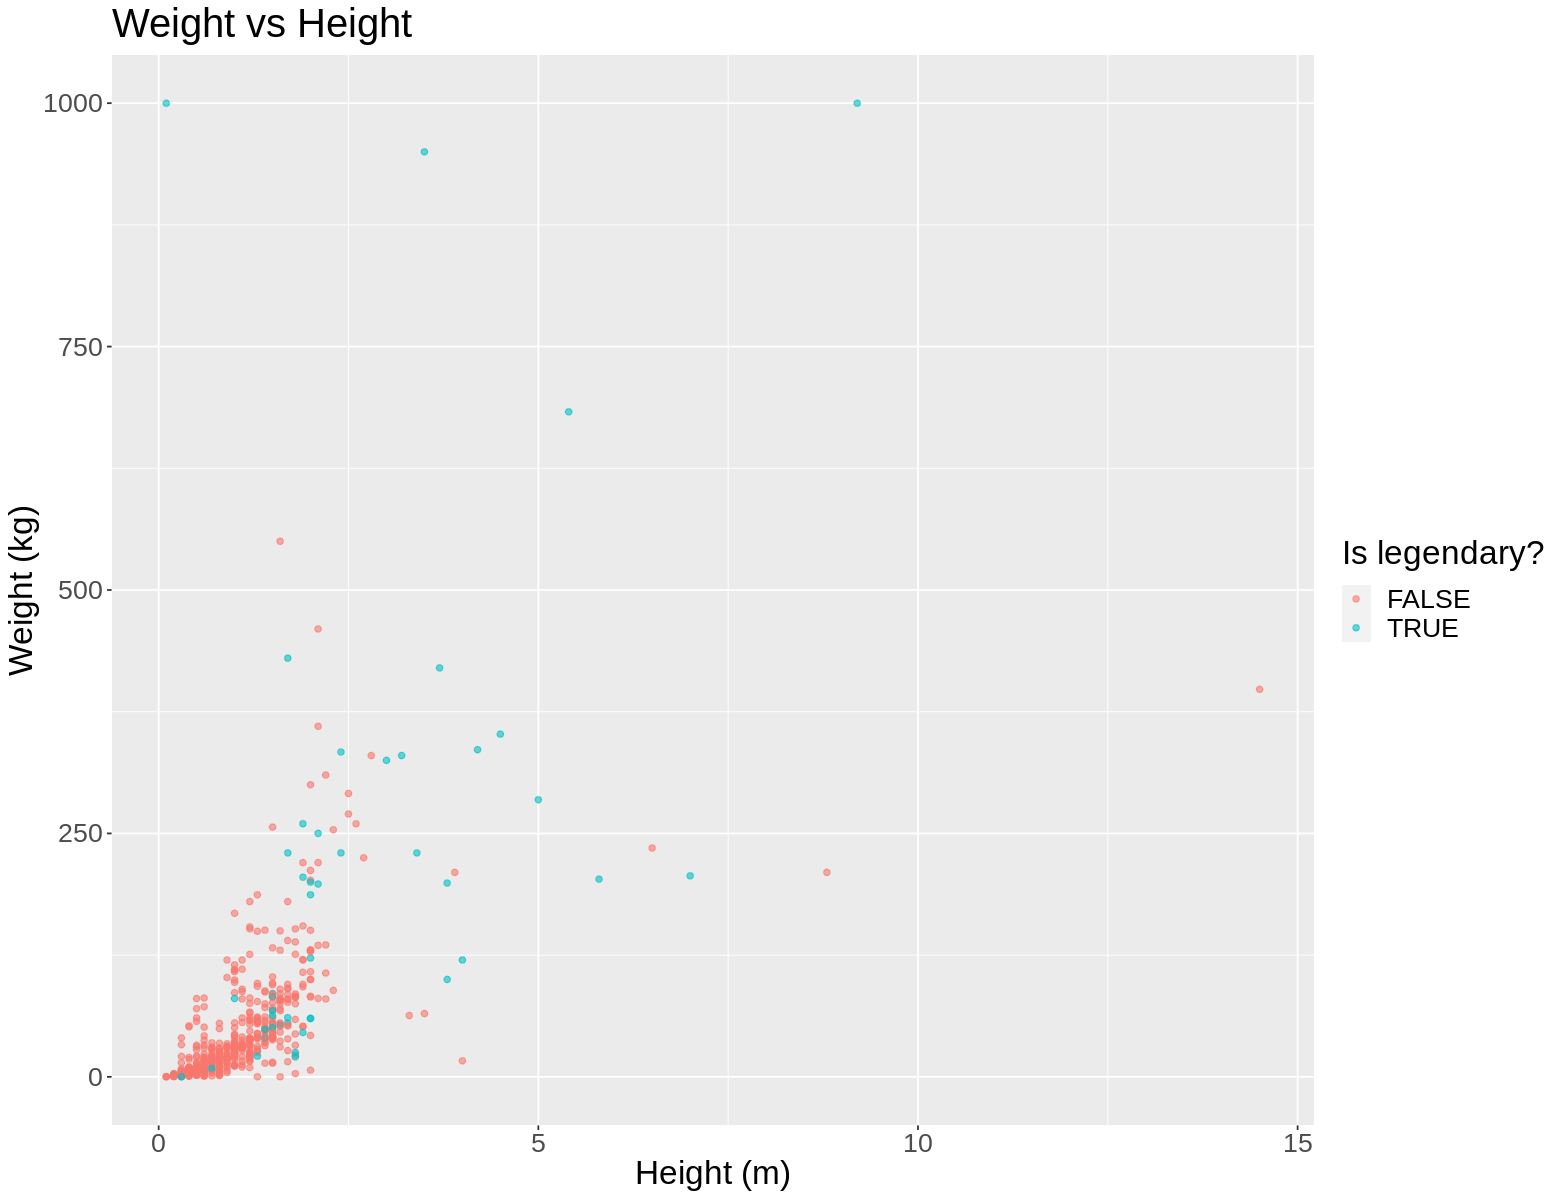

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



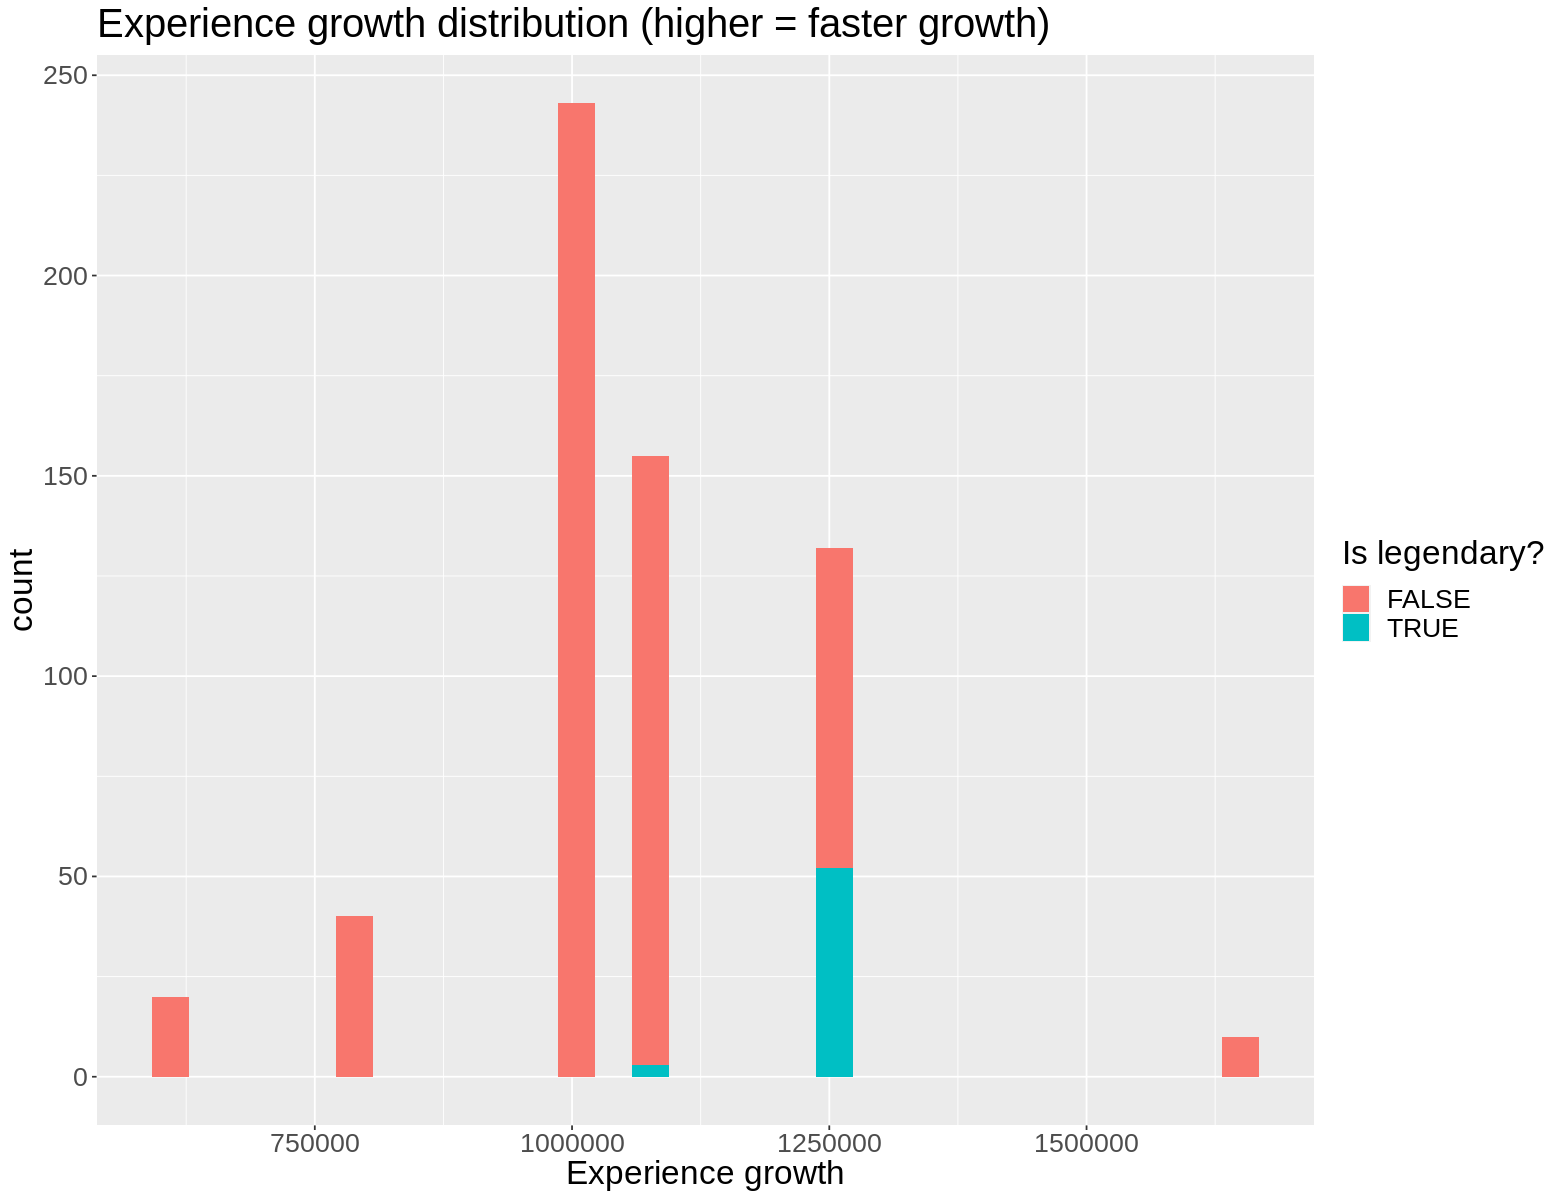

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



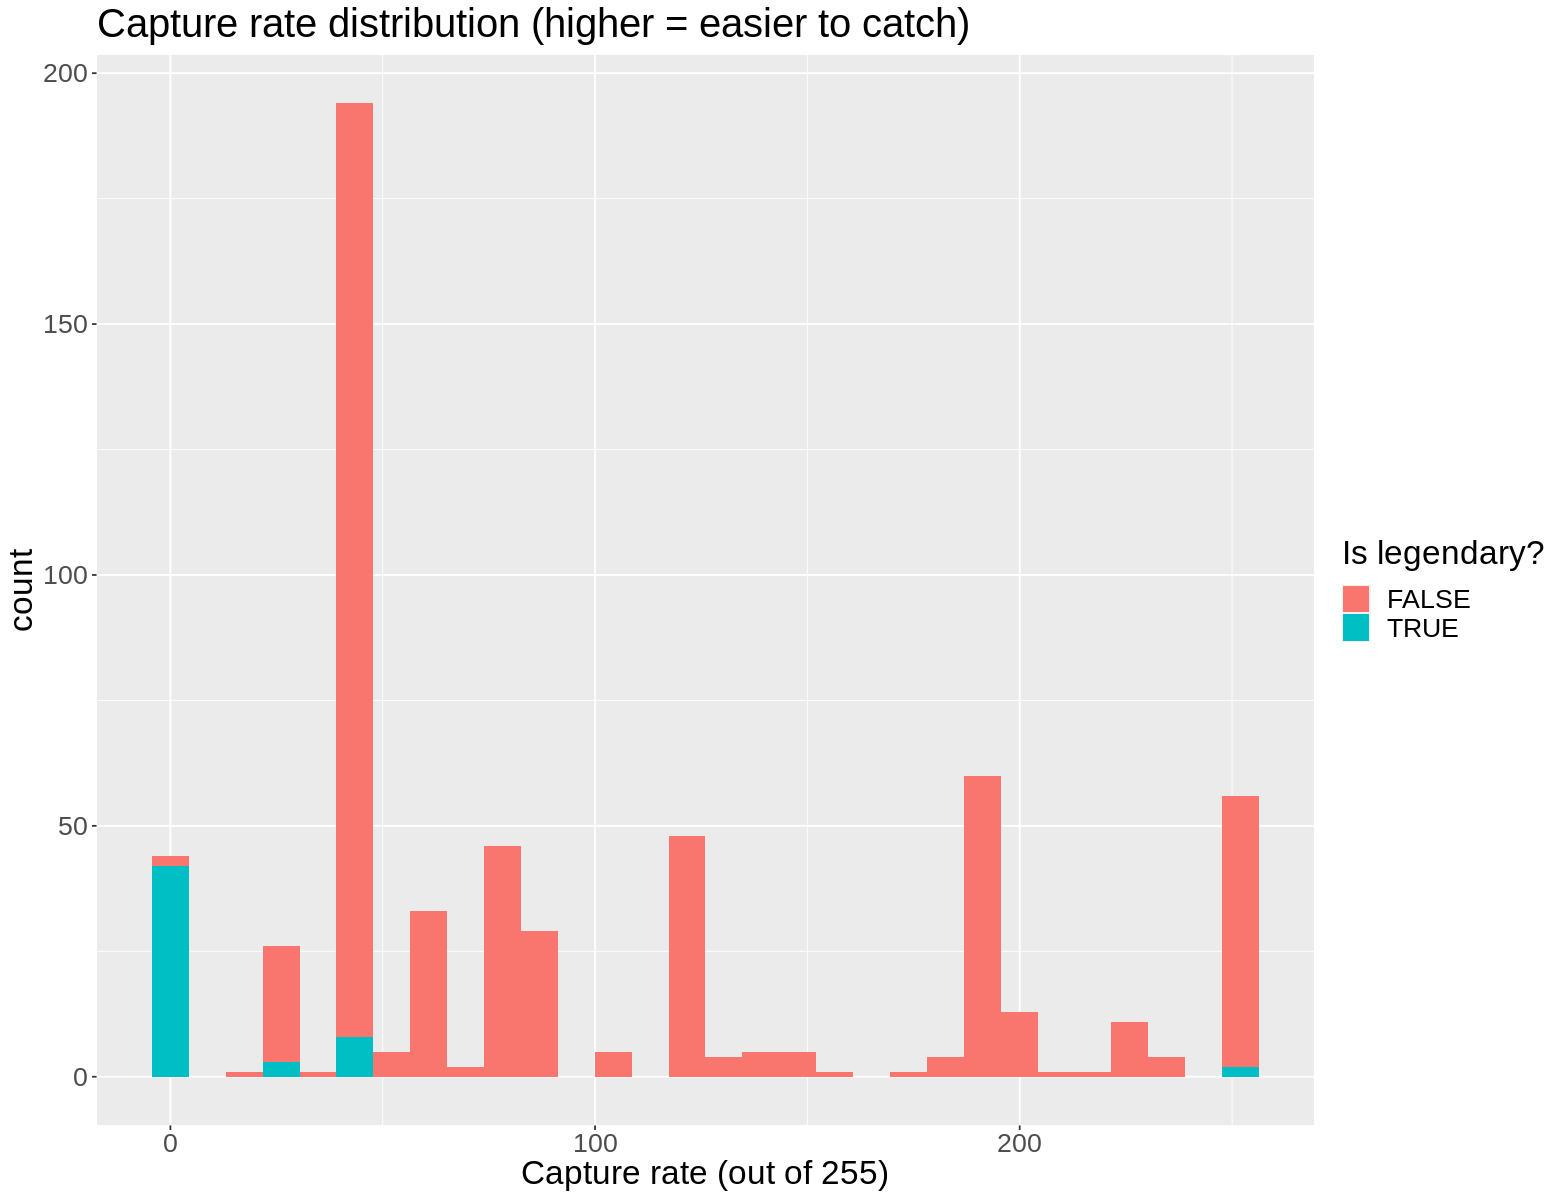

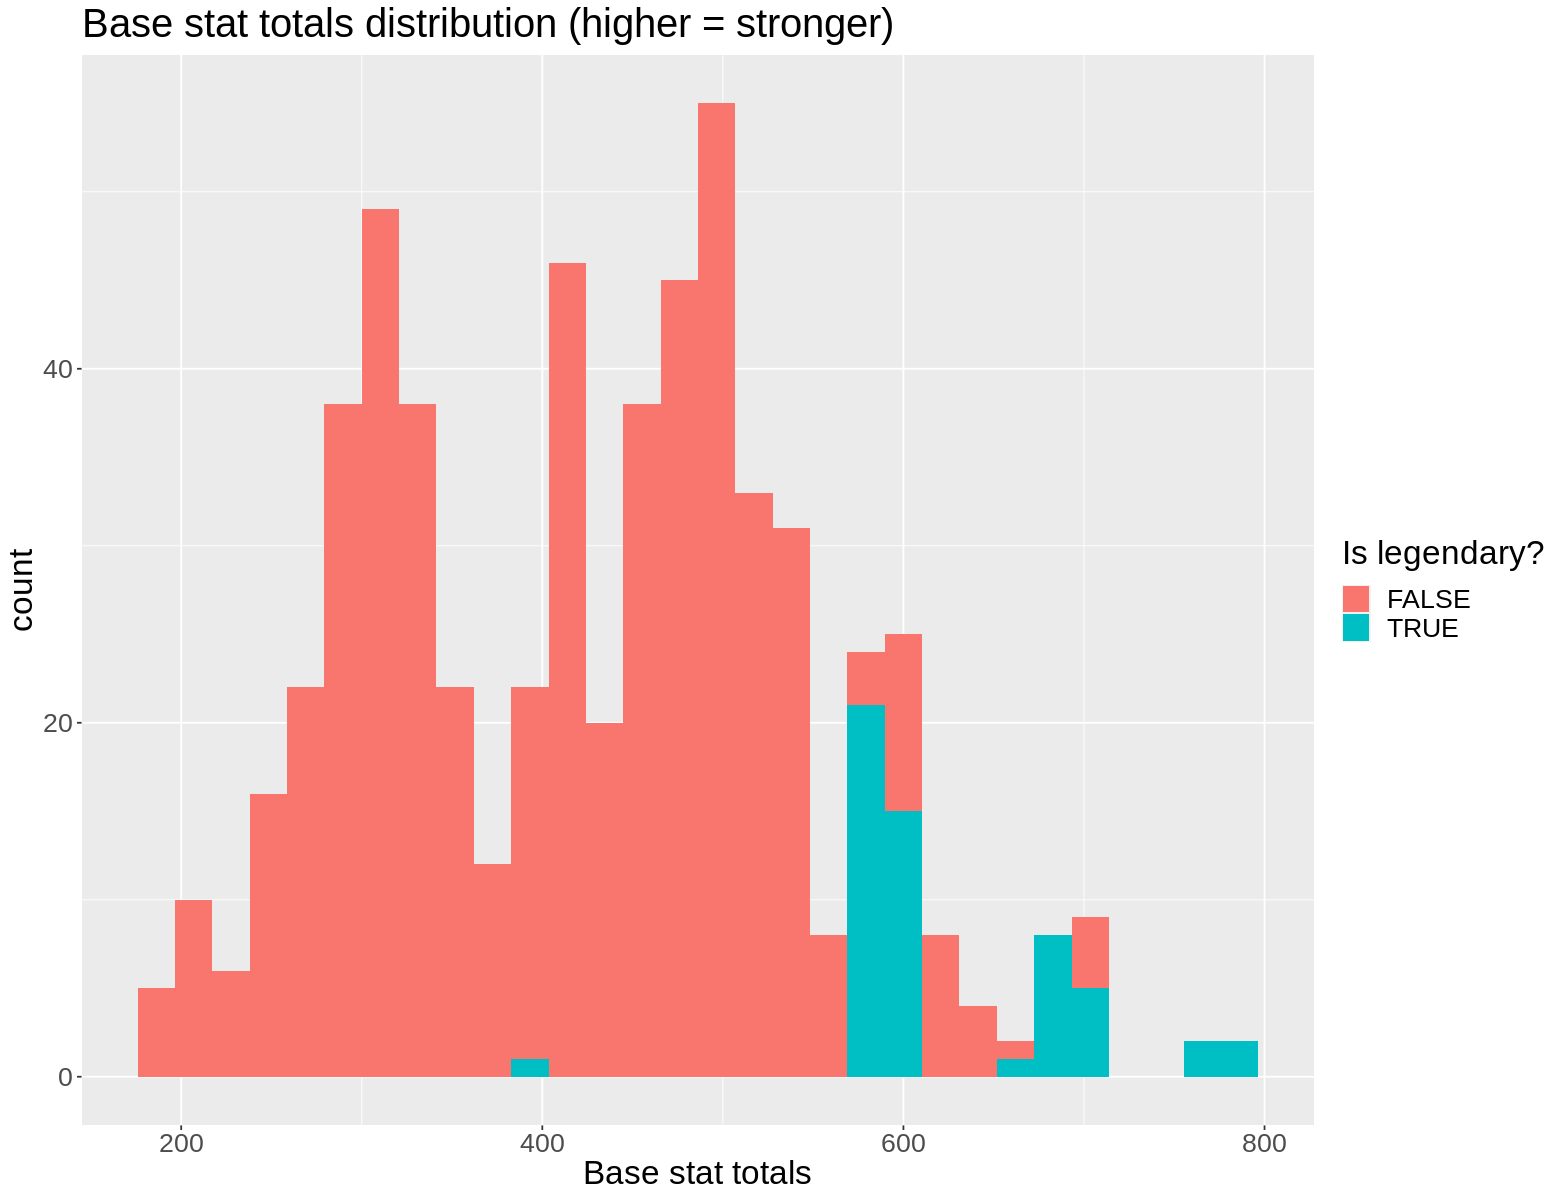

In [5]:
pokemon_split <- initial_split(tidy_pokemon_dataset, prop = 0.75, strata = is_legendary)
pokemon_train <- training(pokemon_split)
pokemon_test <- testing(pokemon_split)


options(repr.plot.width = 13, repr.plot.height = 10) 

# included alpha value due to overplotting
pokemon_plot_height_weight <- ggplot(pokemon_train, aes(x = height_m, y = weight_kg, color = is_legendary)) +
                geom_point(alpha = 0.6) +
                theme(text = element_text(size = 20)) +
                labs(x = "Height (m)", y = "Weight (kg)", color = "Is legendary?") +
                ggtitle("Weight vs Height")

pokemon_plot_experience_growth <- ggplot(pokemon_train, aes(x = experience_growth, fill = is_legendary)) +
                geom_histogram() +
                theme(text = element_text(size = 20)) +
                labs(x = "Experience growth", fill = "Is legendary?") +
                ggtitle("Experience growth distribution (higher = faster growth)")

pokemon_plot_capture_rate <- ggplot(pokemon_train, aes(x = capture_rate, fill = is_legendary)) +
                geom_histogram() +
                theme(text = element_text(size = 20)) +
                labs(x = "Capture rate (out of 255)", fill = "Is legendary?") +
                ggtitle("Capture rate distribution (higher = easier to catch)")

pokemon_plot_base_stats <- ggplot(pokemon_train, aes(x = base_total, fill = is_legendary)) +
                geom_histogram() +
                theme(text = element_text(size = 20)) +
                labs(x = "Base stat totals", fill = "Is legendary?") +
                ggtitle("Base stat totals distribution (higher = stronger)")


pokemon_plot_height_weight
pokemon_plot_experience_growth
pokemon_plot_capture_rate
pokemon_plot_base_stats

<br> We can see that legendary pokemon tend to be taller, heavier, have higher experience growth, lower capture rate, and higher base stat totals. Below, the tables show averages of the predictor variables for both legendaries and non-legendaries. These averages are clearly different for legendaries and non-legendaries. We also show the number of rows missing data for each predictor variable.

In [6]:
num_legendaries <- pokemon_train |>
                    group_by(is_legendary) |>
                    summarize(count = n())

weight_mean <- pokemon_train |>
                    group_by(is_legendary) |>
                    summarize(avg_weight = mean(weight_kg, na.rm = TRUE))

height_mean <- pokemon_train |>
                    group_by(is_legendary) |>
                    summarize(avg_height = mean(height_m, na.rm = TRUE))
base_total_mean <- pokemon_train |>
                    group_by(is_legendary) |>
                    summarize(avg_base_total = mean(base_total, na.rm = TRUE))

exp_mean <- pokemon_train |>
                    group_by(is_legendary) |>
                    summarize(avg_experience_growth = mean(experience_growth, na.rm = TRUE))

capture_mean <- pokemon_train |>
                    group_by(is_legendary) |>
                    summarize(avg_capture_rate = mean(capture_rate, na.rm = TRUE))

num_NA_height <- sum(is.na(pokemon_train$height_m))
num_NA_weight <- sum(is.na(pokemon_train$weight_kg))
num_NA_base_total <- sum(is.na(pokemon_train$base_total))
num_NA_capture_rate <- sum(is.na(pokemon_train$capture_rate))
num_NA_experience_growth <- sum(is.na(pokemon_train$experience_growth))

num_NA_vec <- c("missing height rows" = num_NA_height,
                "missing weight rows" = num_NA_weight,
                "missing base total rows" = num_NA_base_total,
                "missing capture rate rows" = num_NA_capture_rate,
                "missing experience growth rows" = num_NA_experience_growth)

num_NA_table <- bind_rows(num_NA_vec)
num_NA_table

summary_table <- num_legendaries |>
                    bind_cols(select(weight_mean, -is_legendary)) |>
                    bind_cols(select(height_mean, -is_legendary)) |>
                    bind_cols(select(base_total_mean, -is_legendary)) |>
                    bind_cols(select(exp_mean, -is_legendary)) |>
                    bind_cols(select(capture_mean, -is_legendary))

summary_table

missing height rows,missing weight rows,missing base total rows,missing capture rate rows,missing experience growth rows
<int>,<int>,<int>,<int>,<int>
13,13,0,0,0


is_legendary,count,avg_weight,avg_height,avg_base_total,avg_experience_growth,avg_capture_rate
<lgl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,545,45.70169,1.056473,411.5394,1035777,107.20550
TRUE,55,191.43333,2.277778,622.1455,1239629,19.56364


## Methods:
Based on the above tables and plots, the variables: weight, height, base stat total, experience growth, and capture rate clearly tend to have differnent values for legendary and non-legendary pokemon and therefore will be useful for predicting, so we use them as our predictor variables. <br>

For our data analysis, we plan to use K-nearest neighbors to see what a new observation most closely matches with. We plan to center and scale all our data, because some of our predictor variables are on different scales of magnitude. We also plan to use cross-validation to select the best number of neighbors (k). <br>
In addition, we plan to use a line plot to visualize the accuracies of different k values, and use that visualization to justify our k selection. <br>

We will then use the best k value with our model to predict the testing data. We will show the accuracy with a confusion matrix. Also, for incorrect predictions from our model, we plan to use a scatterplot to show the "location" of the new observation and its relation to the closest data points, to visualize how/why our model predicted incorrectly.


## Expected outcomes and significance:
In this project, we expect to find significant predictors, like height, weight, etc, that can help us predict whether a Pokemon is legendary or non-legendary.<br>

The impact is that the findings can help predict if previously unseen Pokemon from new games are legendary or not. <br>

This project could lead to future questions like: What other characteristics of a pokemon can predict whether they are legendary (e.g. typing) ? Can these same characteristics predict whether a pokemon is mythical? (another type of rare pokemon)